# Can You Forecast Daily New Covid Cases in Texas?

### Name: Yang Zhang

### Course: DS 7331

### Date: 08/01/2020

## Content
- [Data Loading and Description](#data_loading)
- [Data Summary and EDA](#eda)
- [Baseline Data Fitting](#baseline_fitting)
- [Data trends/seasonal effects](#data_trends)
- [Model Fitting](#model_fitting)
- [TX Prediction](#tx_prediction)
- [Model Evaluation](#model_evaluation)
- [Model Optimization](#model_optmization)
- [Final RAE Fitting](#final_fitting)

In Summary, an ARIMA model has been used in time series prediction, a new source data from Arizona is imported to be used for prediction with an adjusted scaler. Finally, the MAE of the model is 1.1823752762412022e-08 with the TX real case data.

### Rules
- Due Date, Same as the Lab 3 Deadline, 08/09/2020 11:59 PM.
- Submit one notebook or spreadsheet per student predicting the Pop_Pct or the raw daily New Corona Case Counts for Texas from 07/07/2020 to 08/07/2020 (one month of predictions).
- All submissions must include and use the training data in your submission, be reproducible, and cannot use data for training that occurred past 07/06/2020.
- Your submission must also calculate the final Mean Absolute Error for all predictions when compared to the actual numbers. 
- Plot both the actual vs your predicted Texas new daily case curve from 06/19/2020 to 08/07/2020 in your submission.
- You must be willing to have your submission uploaded to the GitHub site above.
- No partial points will be awarded. You must follow all of the rules.
- You may work in groups, but everyone must submit individually and only 1 winner will receive the extra 5 points.
- In the event of a tie, the extra 5 points will be divided evenly between the winners.  

### Extra Credit Points
- 10 Points per valid submission will be added to your lowest major Lab grade(s).   
- One student per section will be awarded an extra 5 points for creating the submission with the lowest Mean Absolute Error rate over the 30 day prediction period. 
- I will not increase your overall major Lab average above 100%. 

## The Datasets
* The data sets include daily new covid case count curves for TX, NY, and NJ:
 * **TX_Corona_Curve.csv** - 06/19/2020 - 07/06/2020, 18 days data, incomplete curve.
 * **NY_Corona_Curve.csv** - 03/20/2020 - 05/05/2020, 48 days data, completed curve.
 * **NJ_Corona_Curve.csv** - 03/26/2020 - 05/18/2020, 54 days data, completed curve.
 * **Corona_Curves_TX_NY_NJ.csv** - All the data above combined and normalized using each state's population.  
 
* This data was painfully collected from the daily new case counts graphs at: 
 * https://www.worldometers.info/coronavirus/usa/texas/
 * https://www.worldometers.info/coronavirus/usa/new-york/
 * https://www.worldometers.info/coronavirus/usa/new-jersey/

## Data Definitions
* **Pop_Pct** - Represents the % of each respective state's population for the daily new case count (daily new cases / state population)
* **Curve_Day** - Curve day 1 starts when the daily new case count rises above a 0.00015 case to state population ratio.  The curve finishes when the daily new case count falls below a 0.00015 case to state population ratio.    
* **Cases** - The number of daily new Covid Cases for each state. The raw counts are only in the state level files. 
* **Pct_Change** - The change in this percentage for the prior day. (Pop_Pct - Previous day's Pop_Pct) 
* **M1 thru M7** - The prior value minus 1 to minus 7 days ago. 
* **Three_Day_Avg** - The 3 day average including today's value.
* **Seven_Day_Avg** - The 7 day average including today's value.



## 1. Data Loading<a name="data_loading"></a>

In [2]:
#import required Libraries
import pandas as pd
import numpy as np


# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
corona_data = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7331/Extra/CoronaCurves/Corona_Curves_TX_NY_NJ.csv",low_memory=False)
corona_data["Date"] = pd.to_datetime(corona_data["Date"])
corona_data.sort_values(by=['Date'], inplace=True)

In [3]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 18 to 17
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   State                  119 non-null    object        
 1   Date                   119 non-null    datetime64[ns]
 2   Daily_New_Cases        119 non-null    int64         
 3   Curve_Day              119 non-null    int64         
 4   Pop_Pct                119 non-null    float64       
 5   Pop_Pct_M1             119 non-null    float64       
 6   Pop_Pct_M2             119 non-null    float64       
 7   Pop_Pct_M3             119 non-null    float64       
 8   Pop_Pct_M4             119 non-null    float64       
 9   Pop_Pct_M5             119 non-null    float64       
 10  Pop_Pct_M6             119 non-null    float64       
 11  Pop_Pct_M7             119 non-null    float64       
 12  Three_Day_Avg_Pop_Pct  119 non-null    float64       
 13  Seven

## What does the data look like?

In [4]:
pd.set_option('display.max_rows', 500)
corona_data = corona_data.reset_index()
corona_data

,index,State,Date,Daily_New_Cases,Curve_Day,Pop_Pct,Pop_Pct_M1,Pop_Pct_M2,Pop_Pct_M3,Pop_Pct_M4,...,Pct_Change,Pct_Change_M1,Pct_Change_M2,Pct_Change_M3,Pct_Change_M4,Pct_Change_M5,Pct_Change_M6,Pct_Change_M7,Three_Day_Avg_Pct_Chg,Seven_Day_Avg_Pct_Chg
0,18,NY,2020-03-20,3052,1,0.000162,0.000124,0.000071,0.000039,0.000012,...,3.781000e-05,5.312700e-05,3.190800e-05,2.696200e-05,1.223000e-06,5.584000e-06,7.450000e-07,0.000000e+00,4.000000e-05,0.000020
1,19,NY,2020-03-21,1993,2,0.000106,0.000162,0.000124,0.000071,0.000039,...,-5.632000e-05,3.781000e-05,5.312700e-05,3.190800e-05,2.696200e-05,1.223000e-06,5.584000e-06,7.450000e-07,1.000000e-05,0.000010
2,20,NY,2020-03-22,5440,3,0.000289,0.000106,0.000162,0.000124,0.000071,...,1.833100e-04,-5.632000e-05,3.781000e-05,5.312700e-05,3.190800e-05,2.696200e-05,1.223000e-06,5.584000e-06,5.000000e-05,0.000040
3,21,NY,2020-03-23,5123,4,0.000272,0.000289,0.000106,0.000162,0.000124,...,-1.686000e-05,1.833100e-04,-5.632000e-05,3.781000e-05,5.312700e-05,3.190800e-05,2.696200e-05,1.223000e-06,4.000000e-05,0.000040
4,22,NY,2020-03-24,5516,5,0.000293,0.000272,0.000289,0.000106,0.000162,...,2.090000e-05,-1.686000e-05,1.833100e-04,-5.632000e-05,3.781000e-05,5.312700e-05,3.190800e-05,2.696200e-05,6.000000e-05,0.000040
5,23,NY,2020-03-25,6674,6,0.000355,0.000293,0.000272,0.000289,0.000106,...,6.158000e-05,2.090000e-05,-1.686000e-05,1.833100e-04,-5.632000e-05,3.781000e-05,5.312700e-05,3.190800e-05,2.000000e-05,0.000040
6,24,NY,2020-03-26,6097,7,0.000324,0.000355,0.000293,0.000272,0.000289,...,-3.068000e-05,6.158000e-05,2.090000e-05,-1.686000e-05,1.833100e-04,-5.632000e-05,3.781000e-05,5.312700e-05,2.000000e-05,0.000030
7,65,NJ,2020-03-26,2447,1,0.000265,0.000078,0.000089,0.000100,0.000063,...,1.867600e-04,-1.103700e-05,-1.049600e-05,3.668100e-05,1.612200e-05,3.094600e-05,-1.796200e-05,1.666300e-05,5.508000e-05,0.000033
8,66,NJ,2020-03-27,1929,2,0.000209,0.000265,0.000078,0.000089,0.000100,...,-5.605000e-05,1.867600e-04,-1.103700e-05,-1.049600e-05,3.668100e-05,1.612200e-05,3.094600e-05,-1.796200e-05,3.989000e-05,0.000028
9,25,NY,2020-03-27,7380,8,0.000392,0.000324,0.000355,0.000293,0.000272,...,6.823000e-05,-3.068000e-05,6.158000e-05,2.090000e-05,-1.686000e-05,1.833100e-04,-5.632000e-05,3.781000e-05,3.000000e-05,0.000030


In [6]:
corona_data_NY = corona_data.loc[corona_data['State'] == 'NY']
corona_data_NJ = corona_data.loc[corona_data['State'] == 'NJ']
corona_data_TX = corona_data.loc[corona_data['State'] == 'TX']
corona_data_NY.shape
corona_data_NJ.shape
corona_data_TX.shape

(47, 24)

(54, 24)

(18, 24)

## 2. Data Plotting <a name="eda"></a>

In [247]:
import altair as alt

alt.Chart(corona_data).mark_line().encode(
    x='Date',
    y='Pop_Pct'
)

alt.Chart(...)

In [248]:
def plot_column_point(row_name: str, col_name: str) -> alt.Chart:
    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['index'], empty='none')

    # The basic line
    line = alt.Chart(corona_data).mark_line(interpolate='basis').encode(
        x=f"{row_name}:Q",
        y=f"{col_name}:Q",
        color='State:N'
    )

    # Transparent selectors across the chart. This is what tells us
    # the x-value of the cursor
    selectors = alt.Chart(corona_data).mark_point().encode(
        x=f"{row_name}:Q",
        opacity=alt.value(0),
    ).add_selection(
        nearest
    )

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    )

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.condition(nearest, f"{col_name}:Q", alt.value(' '))
    )

    # Draw a rule at the location of the selection
    rules = alt.Chart(corona_data).mark_rule(color='gray').encode(
        x=f"{row_name}:Q",
    ).transform_filter(
        nearest
    )
    
    return alt.layer(
    line, selectors, points, rules, text
    ).properties(
    width=600, height=300
    )

In [249]:
plot_column_point("Curve_Day","Pop_Pct")

alt.LayerChart(...)

In [250]:
plot_column_point("Curve_Day","Pct_Change")

alt.LayerChart(...)

In [251]:
def plot_column2(col_name: str) -> alt.Chart:
    return alt.Chart(corona_data).mark_line(interpolate='basis').encode(
        x="Date:T",
        y=f"{col_name}:Q",
        color='State:N'
        ).properties(width=600, height=300)

plot_column2("Pop_Pct")

alt.Chart(...)

In [252]:
plot_column2("Pct_Change")

alt.Chart(...)

## 3. Baseline Data Fitting <a name="baseline_fitting"></a>

Below codes are reference to the Corona "Curve Forecast.ipynb" notebook provided.
## Create a Test and Train Dataset

In [258]:
y = corona_data["Pop_Pct"]
X = corona_data.drop(['State','Date','Pop_Pct','Daily_New_Cases','Pct_Change'], 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 18 to 17
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Curve_Day              119 non-null    int64  
 1   Pop_Pct_M1             119 non-null    float64
 2   Pop_Pct_M2             119 non-null    float64
 3   Pop_Pct_M3             119 non-null    float64
 4   Pop_Pct_M4             119 non-null    float64
 5   Pop_Pct_M5             119 non-null    float64
 6   Pop_Pct_M6             119 non-null    float64
 7   Pop_Pct_M7             119 non-null    float64
 8   Three_Day_Avg_Pop_Pct  119 non-null    float64
 9   Seven_Day_Avg_Pop_Pct  119 non-null    float64
 10  Pct_Change_M1          119 non-null    float64
 11  Pct_Change_M2          119 non-null    float64
 12  Pct_Change_M3          119 non-null    float64
 13  Pct_Change_M4          119 non-null    float64
 14  Pct_Change_M5          119 non-null    float64
 15  Pct_Ch

## Perform Cross Validation for Time Series Data

### Time Series Split
**This is a form of cross validation for time series data where each fold is a superset of the previous fold, and test records are selected from records / indices which occur after the training data.**
* Note below that each 
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [259]:
from sklearn.model_selection import TimeSeriesSplit

n=10
cv = TimeSeriesSplit(n_splits=n)
x = cv.split(X,y)

for i in range(n):
    train, test = next(x)
    print('Fold',i,'Train Records:',len(train),'Test Records:', len(test))

Fold 0 Train Records: 19 Test Records: 10
Fold 1 Train Records: 29 Test Records: 10
Fold 2 Train Records: 39 Test Records: 10
Fold 3 Train Records: 49 Test Records: 10
Fold 4 Train Records: 59 Test Records: 10
Fold 5 Train Records: 69 Test Records: 10
Fold 6 Train Records: 79 Test Records: 10
Fold 7 Train Records: 89 Test Records: 10
Fold 8 Train Records: 99 Test Records: 10
Fold 9 Train Records: 109 Test Records: 10


## Scale the Dataset

In [263]:
# Scale dataset converting to standard normally distributed data 
# (e.g. Gaussian with 0 mean and unit variance).
from sklearn.preprocessing import StandardScaler

#Fit to data for scaling
scaler = StandardScaler()
scaler.fit(X)

# Transform training data
# This makes our model's coefficients take on the same scale for 
# accurate feature importance analisys 
X_scaled = scaler.transform(X)

X_scaled.shape

StandardScaler(copy=True, with_mean=True, with_std=True)

(119, 19)

### Polynomial Features 
**You may use polynomial features to perform regression on curved data**

#### Helpful Links
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
* https://stackoverflow.com/questions/51906274/cannot-understand-with-sklearns-polynomialfeatures
* https://stackoverflow.com/questions/32660231/how-to-fit-a-polynomial-curve-to-data-using-scikit-learn

In [264]:
# Create polynomial features to try and let the model know we are dealing with a curve
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(X_scaled)

X_scaled_poly = poly.transform(X_scaled)

X_scaled_poly.shape

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

(119, 210)

#### Linear Regression Results as the Baseline

In [265]:
from sklearn.linear_model import LinearRegression

#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = LinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_scaled_poly, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [14]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               } 

In [266]:
from sklearn.model_selection import cross_validate

regEstimator = regGridSearch.best_estimator_

scores = cross_validate(regEstimator, X_scaled_poly, y, scoring=errorScoring, cv=cv, return_train_score=True)

#### Error Measurements

In [267]:
maeAvg = scores['test_MAE'].mean()
maeAvg
mape_avg = scores['test_MAPE'].mean()
mape_avg
RMSEavg = scores['test_RMSE'].mean()
RMSEavg

-4.013649040176158e-05

-12.764830495902867

-4.9852448601124946e-05

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

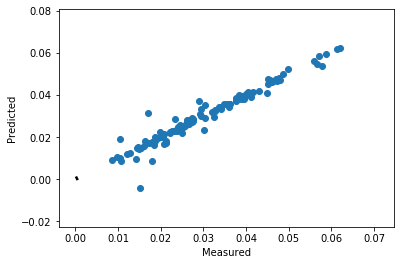

In [23]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

predicted = cross_val_predict(regEstimator, X_scaled_poly, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y*100, predicted*100)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 4. Data trends/seasonal effects <a name="data_trends"></a>

Before fitting time series model, we first study the data for possible trends/seasonal effects.

In [7]:
test_NY = corona_data_NY[['Date','Pop_Pct']]
test_NJ = corona_data_NJ[['Date','Pop_Pct']]
test_TX = corona_data_TX[['Date','Pop_Pct']]

In [8]:
test_NY.index = pd.DatetimeIndex(test_NY['Date'])
test_NY = test_NY.drop(columns=['Date'])

test_NJ.index = pd.DatetimeIndex(test_NJ['Date'])
test_NJ = test_NJ.drop(columns=['Date'])

test_TX.index = pd.DatetimeIndex(test_TX['Date'])
test_TX = test_TX.drop(columns=['Date'])

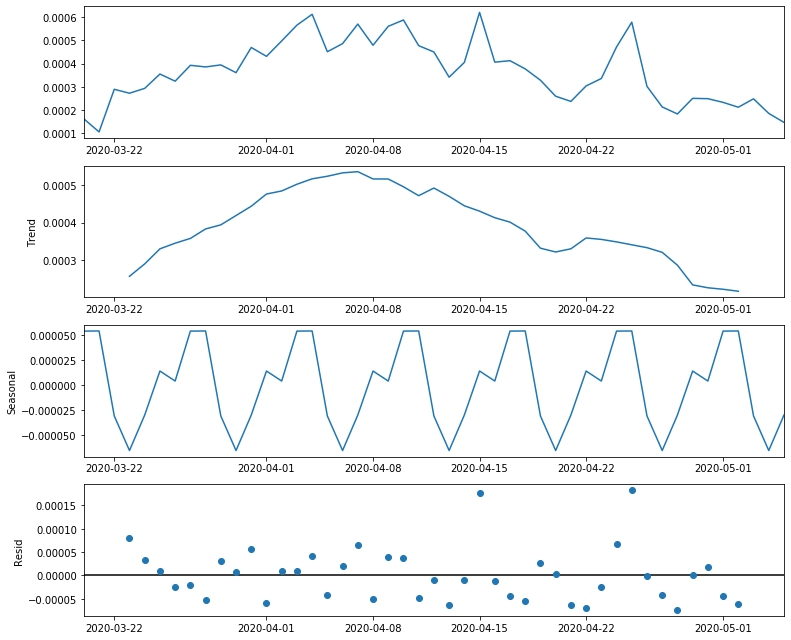

In [14]:
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(test_NY, model='additive')
fig = decomposition.plot()
plt.show()

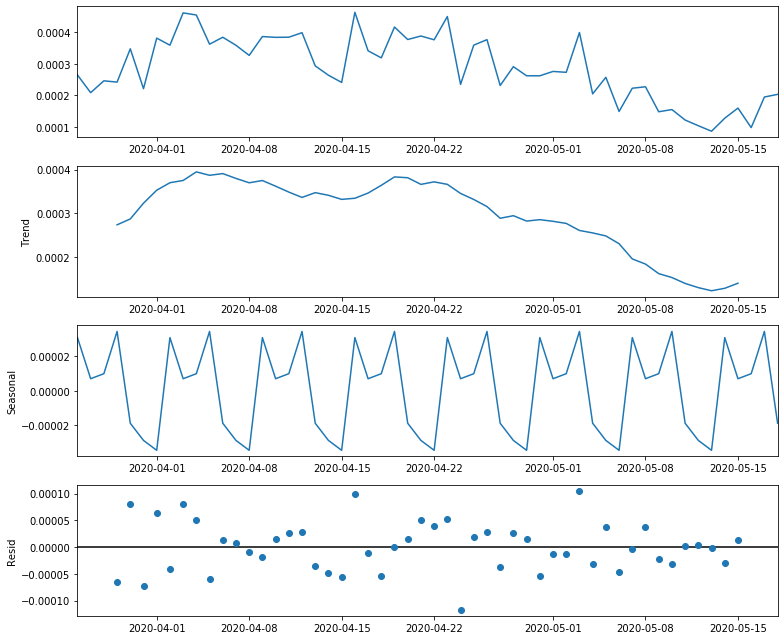

In [38]:

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(test_NJ, model='additive')
fig = decomposition.plot()
plt.show()

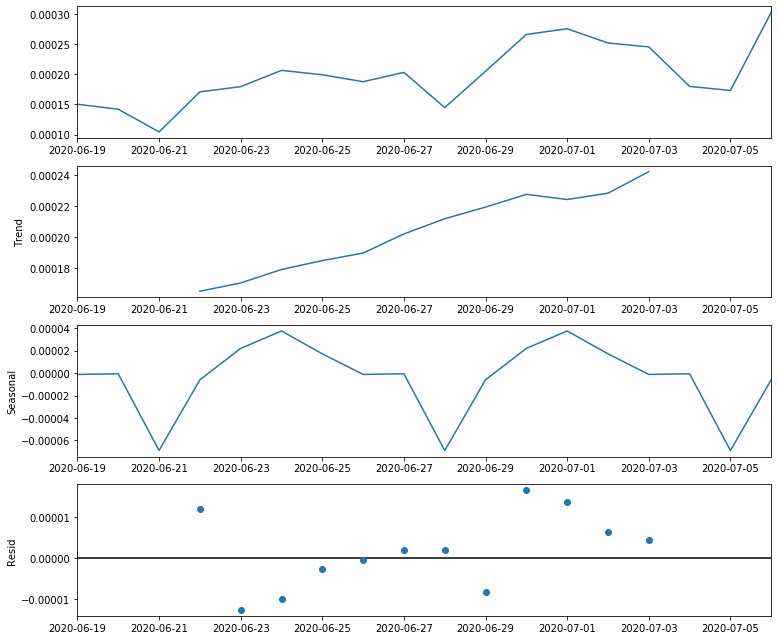

In [39]:

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(test_TX, model='additive')
fig = decomposition.plot()
plt.show()

All three groups above have both trends and seasonal effects of weeks (7 days).

## 5. Model Fitting <a name="model_fitting"></a>

### Choose the model type to be SARIMAX

In [6]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages


#### Fit NY Data seperately 

In [12]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test_NY,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [15]:
modNY = sm.tsa.statespace.SARIMAX(test_NY,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsNY = modNY.fit()

print(resultsNY.summary().tables[1])

C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4042   1.76e-17   -2.3e+16      0.000      -0.404      -0.404
ar.S.L7       -0.4395   1.27e-17  -3.46e+16      0.000      -0.440      -0.440
ma.S.L7       -0.3263    2.3e-17  -1.42e+16      0.000      -0.326      -0.326
sigma2      9.769e-09   2.84e-09      3.437      0.001     4.2e-09    1.53e-08


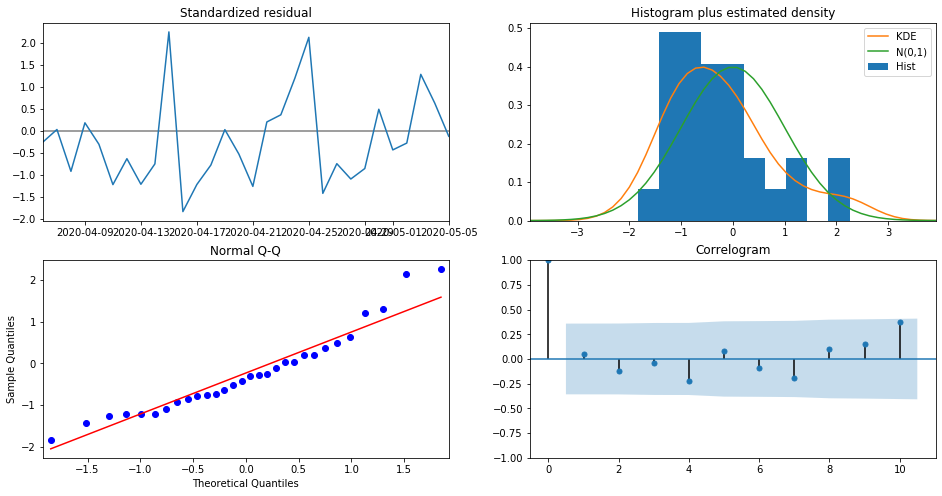

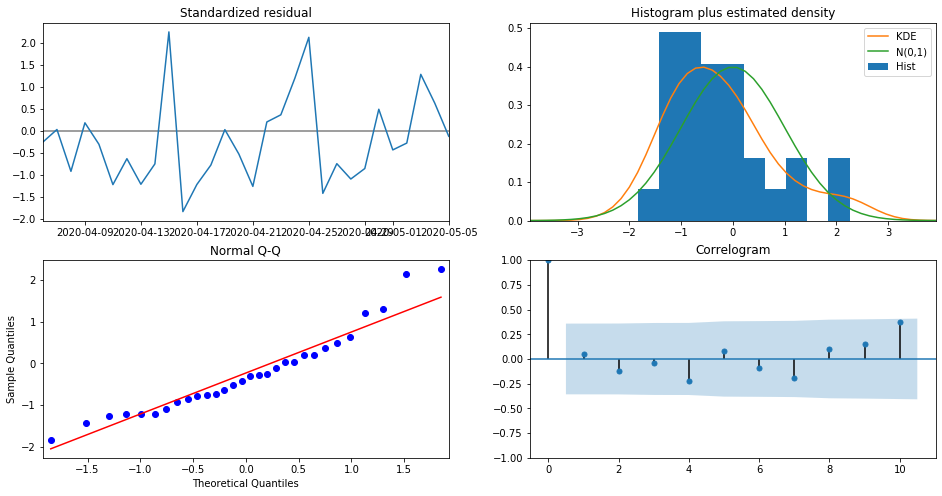

In [17]:
resultsNY.plot_diagnostics(figsize=(16, 8))
plt.show()

In [82]:
pred = resultsNY.get_prediction(start=pd.to_datetime('2020-04-04'), dynamic=False)
pred_ci = pred.conf_int()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Pct Levels')

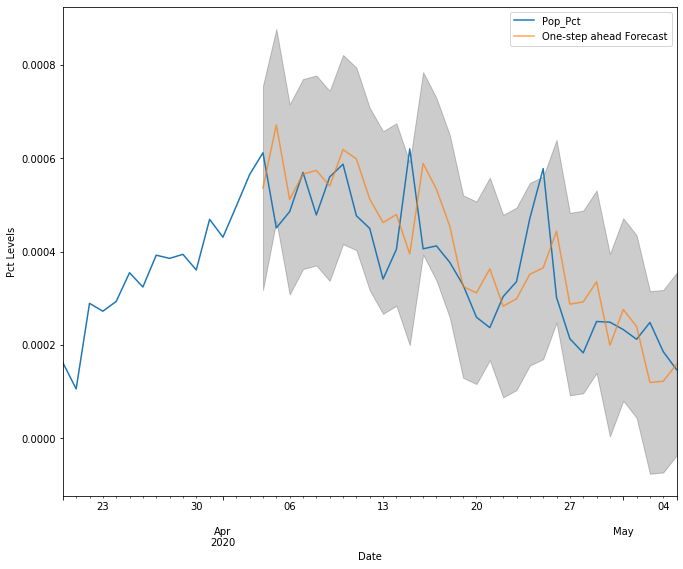

In [83]:
ax = test_NY['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Pct Levels')
plt.legend()

plt.show()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = test_NY['2020-04-04':]

# Compute the mean square error
mse = ((y_forecasted - y_truth.transpose()) ** 2).mean()
np.average(mse)

Date
2020-04-04    5.672761e-09
2020-04-05    4.867199e-08
2020-04-06    6.788133e-10
2020-04-07    1.273384e-11
2020-04-08    9.090989e-09
2020-04-09    3.740828e-10
2020-04-10    9.787325e-10
2020-04-11    1.482259e-08
2020-04-12    3.952038e-09
2020-04-13    1.463257e-08
2020-04-14    5.575358e-09
2020-04-15    5.063978e-08
2020-04-16    3.350956e-08
2020-04-17    1.474155e-08
2020-04-18    5.977653e-09
2020-04-19    9.582067e-12
2020-04-20    2.740093e-09
2020-04-21    1.583069e-08
2020-04-22    4.214224e-10
2020-04-23    1.351608e-09
2020-04-24    1.433833e-08
2020-04-25    4.526048e-08
2020-04-26    2.005811e-08
2020-04-27    5.503320e-09
2020-04-28    1.188806e-08
2020-04-29    7.257674e-09
2020-04-30    2.438943e-09
2020-05-01    1.842997e-09
2020-05-02    7.503824e-10
2020-05-03    1.654973e-08
2020-05-04    3.991361e-09
2020-05-05    1.441561e-10
dtype: float64

In [58]:
def mape2(y_actual, y_predicted): 
    return np.average((np.fabs(y_actual.transpose() - y_predicted)/y_actual.transpose()).mean() * 100)

In [74]:
rmse(y_truth, y_forecasted)
mape2(y_truth, y_forecasted)
mean_squared_error(y_truth, y_forecasted)

0.00010602301394219546

24.84533906119679

1.1240879485386972e-08

#### Fit NJ Data seperately 

In [75]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test_NJ,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:-705.3581693462194
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:-638.1779060174493
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:-711.5098857769781
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:-608.7031118935863
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:-729.4061060578315
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:-712.048216232789
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:-626.0165704105684
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:-606.3088886275691
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:-715.5596586732889
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:-644.6031010737225
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:-709.5783164328857
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:-598.5185776136253
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:-737.7336611944675
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:-709.4511984344138
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:-631.709101751118
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:-596.3677658238323
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:-827.4094109067883
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:-722.0196917490174
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 -

In [18]:
modNJ = sm.tsa.statespace.SARIMAX(test_NJ,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsNJ = modNJ.fit()

print(resultsNJ.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0797   5.36e-18  -1.49e+16      0.000      -0.080      -0.080
ma.L1         -0.4362   6.57e-19  -6.64e+17      0.000      -0.436      -0.436
ar.S.L7       -0.0667   5.51e-18  -1.21e+16      0.000      -0.067      -0.067
ma.S.L7       -0.4817   2.81e-18  -1.72e+17      0.000      -0.482      -0.482
sigma2      7.084e-09   2.24e-09      3.163      0.002    2.69e-09    1.15e-08


C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


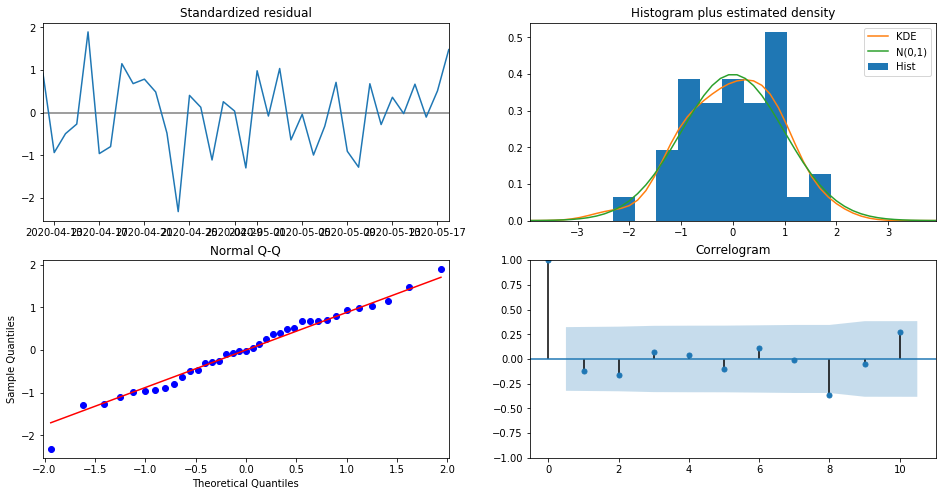

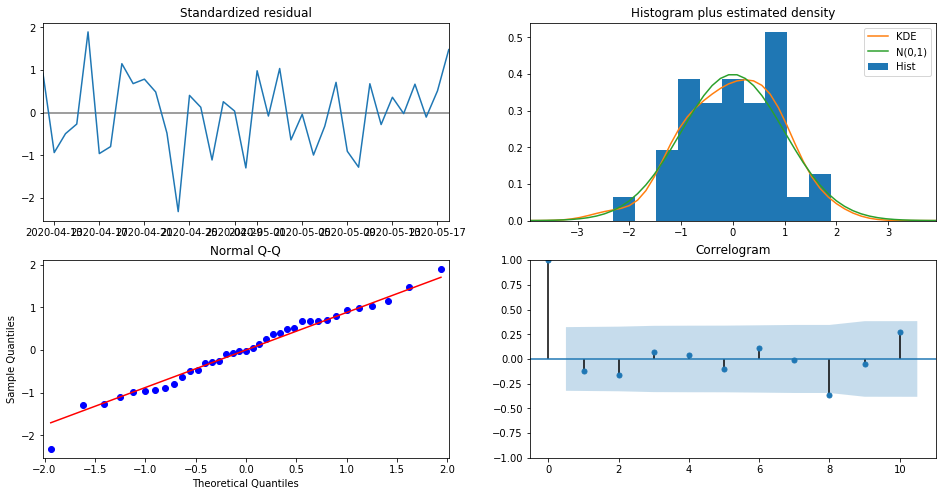

In [19]:
resultsNJ.plot_diagnostics(figsize=(16, 8))
plt.show()

In [85]:
pred = resultsNJ.get_prediction(start=pd.to_datetime('2020-04-10'), dynamic=False)
pred_ci = pred.conf_int()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Pct Levels')

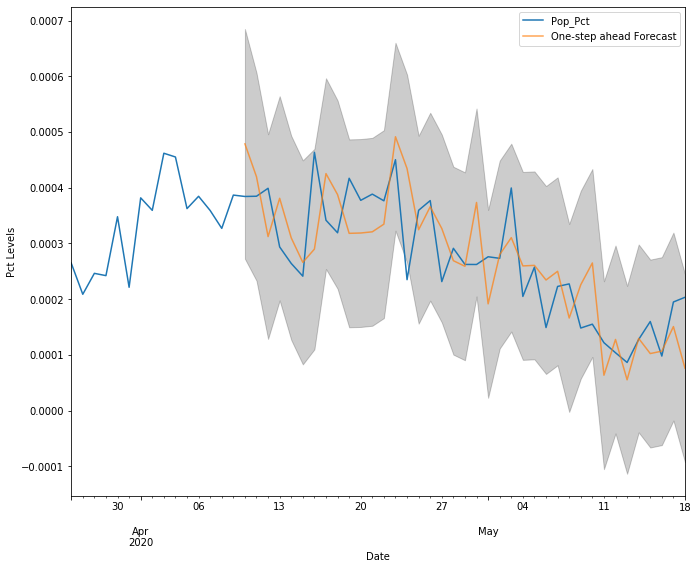

In [86]:
ax = test_NJ['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Pct Levels')
plt.legend()

plt.show()

In [79]:
y_forecasted = pred.predicted_mean
y_truth = test_NJ['2020-04-10':]

# Compute the mean square error
mse = ((y_forecasted - y_truth.transpose()) ** 2).mean()
np.average(mse)

5.863116779808135e-09

In [80]:
rmse(y_truth, y_forecasted)
mape2(y_truth, y_forecasted)
mean_squared_error(y_truth, y_forecasted)

7.657099176455882e-05

25.766330783167664

5.863116779808135e-09

A SARIMAX model by NJ seperately get better model with smaller errors compared with NY ones

## 6. TX Prediction <a name="tx_prediction"></a>

#### Using NY model to predict TX

In [161]:
test_NY_curveDay = corona_data_NY[['Curve_Day','Pop_Pct']]
test_NY_curveDay

,Curve_Day,Pop_Pct
18,1,0.000162
19,2,0.000106
20,3,0.000289
21,4,0.000272
22,5,0.000293
23,6,0.000355
24,7,0.000324
25,8,0.000392
26,9,0.000386
27,10,0.000394


In [162]:
test_TX_curveDay = corona_data_TX[['Curve_Day','Pop_Pct']]
test_TX_curveDay

,Curve_Day,Pop_Pct
0,1,0.000150
1,2,0.000142
2,3,0.000104
3,4,0.000171
4,5,0.000180
5,6,0.000207
6,7,0.000199
7,8,0.000188
8,9,0.000203
9,10,0.000145


In [71]:
merge_curveDay = pd.merge(test_NY_curveDay, test_TX_curveDay, on='Curve_Day', how='outer', indicator=True)

In [72]:
temp = merge_curveDay[:18]
merge_curveDay_TX = temp[['Curve_Day', 'Pop_Pct_y']]
merge_curveDay_TX

,Curve_Day,Pop_Pct_y
0,1,0.000150
1,2,0.000142
2,3,0.000104
3,4,0.000171
4,5,0.000180
5,6,0.000207
6,7,0.000199
7,8,0.000188
8,9,0.000203
9,10,0.000145


In [73]:
merge_curveDay_TX = merge_curveDay_TX.set_index('Curve_Day')
merge_curveDay_TX

,Pop_Pct_y
Curve_Day,
1,0.000150
2,0.000142
3,0.000104
4,0.000171
5,0.000180
6,0.000207
7,0.000199
8,0.000188
9,0.000203


In [163]:
test_NY_curveDay = test_NY_curveDay.set_index('Curve_Day')
test_NY_curveDay

,Pop_Pct
Curve_Day,
1,0.000162
2,0.000106
3,0.000289
4,0.000272
5,0.000293
6,0.000355
7,0.000324
8,0.000392
9,0.000386


#### We apply a scaled trend to NY model to predict TX case. We will talk about optimizing the scalers in later parts.

In [74]:
merge_curveDay_TX_scal = merge_curveDay_TX/0.55

In [164]:
modNY_C = sm.tsa.statespace.SARIMAX(test_NY_curveDay,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsNY_C = modNY_C.fit()

print(resultsNY_C.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4042   1.76e-17   -2.3e+16      0.000      -0.404      -0.404
ar.S.L7       -0.4395   1.27e-17  -3.46e+16      0.000      -0.440      -0.440
ma.S.L7       -0.3263    2.3e-17  -1.42e+16      0.000      -0.326      -0.326
sigma2      9.769e-09   2.84e-09      3.437      0.001     4.2e-09    1.53e-08


In [165]:
pred_NY_C = resultsNY_C.get_prediction(start=18,dynamic=False)

In [123]:
pred_NY_C.predicted_mean

Curve_Day
19    0.000566
20    0.000574
21    0.000541
22    0.000619
23    0.000599
24    0.000513
25    0.000462
26    0.000480
27    0.000395
28    0.000589
29    0.000534
30    0.000454
31    0.000325
32    0.000312
33    0.000363
34    0.000283
35    0.000299
36    0.000352
37    0.000365
38    0.000444
39    0.000288
40    0.000292
41    0.000336
42    0.000200
43    0.000276
44    0.000240
45    0.000120
46    0.000122
47    0.000159
dtype: float64

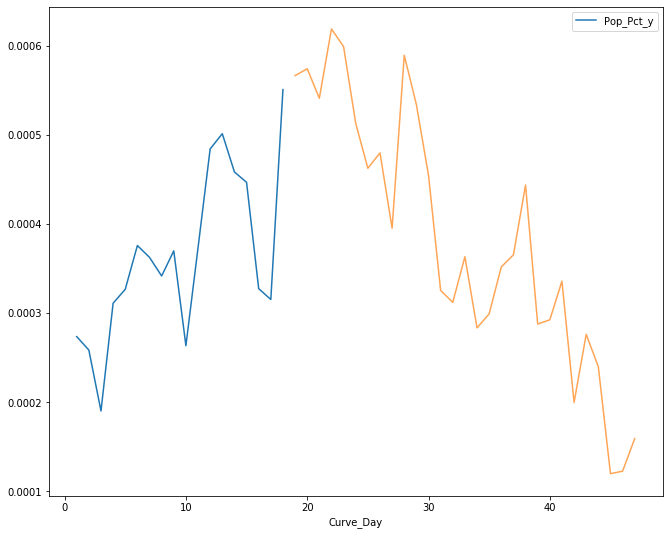

In [124]:
ax = merge_curveDay_TX_scal.plot(label='observed')
pred_NY_C.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
plt.show()

#### Using NJ model to predict TX

In [158]:
test_NJ_curveDay = corona_data_NJ[['Curve_Day','Pop_Pct']]
test_NJ_curveDay = test_NJ_curveDay.set_index('Curve_Day')
test_NJ_curveDay

,Pop_Pct
Curve_Day,
1,0.000265
2,0.000209
3,0.000246
4,0.000242
5,0.000348
6,0.000221
7,0.000382
8,0.000359
9,0.000462


In [159]:
modNJ_C = sm.tsa.statespace.SARIMAX(test_NJ_curveDay,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsNJ_C = modNJ_C.fit()

print(resultsNJ_C.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5171   3.01e-11  -1.72e+10      0.000      -0.517      -0.517
ar.S.L7       -0.0667   1.56e-10  -4.28e+08      0.000      -0.067      -0.067
ma.S.L7       -0.4817   3.23e-11  -1.49e+10      0.000      -0.482      -0.482
sigma2      1.356e-11   1.08e-10      0.126      0.900   -1.98e-10    2.25e-10


In [160]:
pred_NJ_C = resultsNJ_C.get_prediction(start=18,dynamic=False)
pred_NJ_C.predicted_mean

Curve_Day
19    0.000407
20    0.000288
21    0.000250
22    0.000305
23    0.000420
24    0.000370
25    0.000343
26    0.000288
27    0.000329
28    0.000339
29    0.000605
30    0.000360
31    0.000235
32    0.000426
33    0.000348
34    0.000268
35    0.000287
36    0.000341
37    0.000052
38    0.000363
39    0.000315
40    0.000227
41    0.000276
42    0.000236
43    0.000148
44    0.000242
45    0.000210
46    0.000297
47   -0.000008
48    0.000150
49   -0.000004
50    0.000148
51    0.000138
52    0.000084
53    0.000084
54    0.000150
dtype: float64

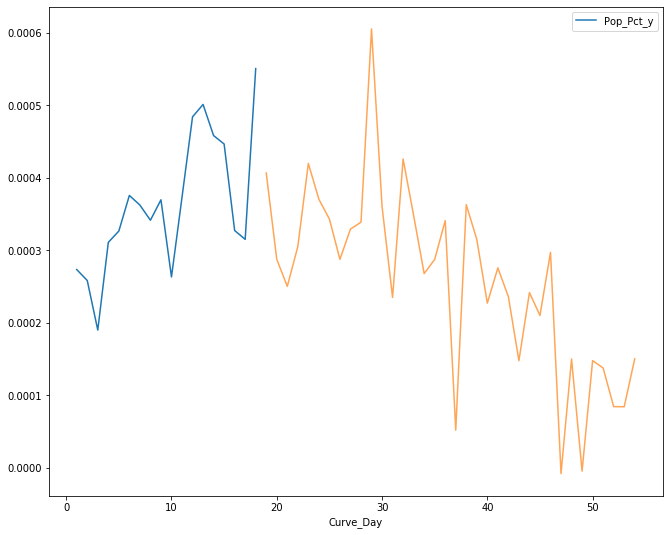

In [130]:
ax = merge_curveDay_TX_scal.plot(label='observed')
pred_NJ_C.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
plt.show()

## 7. Model Evaluation <a name="model_evaluation"></a>

### Just for QC purpose, I import real new cases in TX, until 08/06/2020
Scaled data are using original scaler of 0.55

In [283]:
TX_data = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7331/Extra/CoronaCurves/TX_data.csv",low_memory=False)
TX_data

,Date,Curve_Day,Pop,Pop_Pct,Pop_Pct_scal
0,7/7/2020,19,9828,0.000329,0.000598
1,7/8/2020,20,10649,0.000356,0.000648
2,7/9/2020,21,11901,0.000398,0.000724
3,7/10/2020,22,10554,0.000353,0.000642
4,7/11/2020,23,8674,0.000290,0.000527
5,7/12/2020,24,6363,0.000213,0.000387
6,7/13/2020,25,9457,0.000316,0.000575
7,7/14/2020,26,11514,0.000385,0.000700
8,7/15/2020,27,12490,0.000418,0.000760
9,7/16/2020,28,10243,0.000343,0.000623


In [284]:
TX_data.index = TX_data['Curve_Day']
TX_data = TX_data.drop(columns=['Curve_Day'])
TX_data_sub = TX_data['Pop_Pct_scal']

In [285]:
TX_data_sub

Curve_Day
19    0.000598
20    0.000648
21    0.000724
22    0.000642
23    0.000527
24    0.000387
25    0.000575
26    0.000700
27    0.000760
28    0.000623
29    0.000577
30    0.000483
31    0.000530
32    0.000482
33    0.000628
34    0.000640
35    0.000572
36    0.000520
37    0.000470
38    0.000262
39    0.000376
40    0.000688
41    0.000560
42    0.000538
43    0.000593
44    0.000408
45    0.000425
46    0.000682
47    0.000682
48    0.000585
49    0.000464
50    0.000467
Name: Pop_Pct_scal, dtype: float64

Using NY Model, calculate errors

In [286]:
y_forecasted_fromNY = pred_NY_C.predicted_mean
y_truth = TX_data_sub

mse = ((y_forecasted_fromNY - y_truth) ** 2).mean()
mse

6.247104827978899e-08

In [168]:
y_forecasted_fromNY.shape

(29,)

In [180]:
y_truth.shape

(31,)

In [181]:
y_forecasted_fromNY.shape

(29,)

In [287]:
rmse(y_truth[0:29], y_forecasted_fromNY[0:29])
mape2(y_truth[0:29], y_forecasted_fromNY[0:29])
mean_squared_error(y_truth[0:29], y_forecasted_fromNY[0:29])

0.0002499420898524076

36.63733309648533

6.247104827978899e-08

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

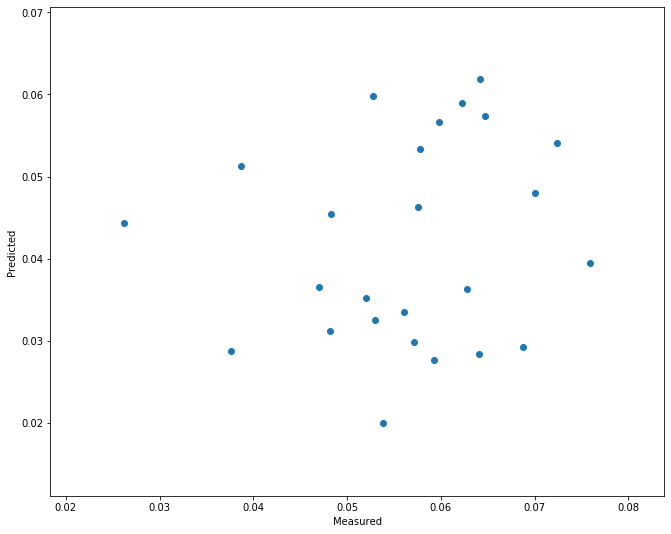

In [149]:
fig, ax = plt.subplots()
ax.scatter(y_truth*100, y_forecasted_fromNY[0:25]*100)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

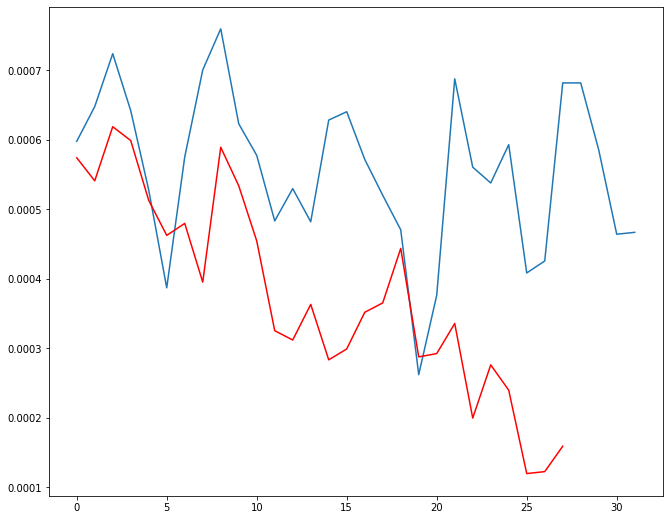

In [290]:
plt.plot(y_truth.values)
plt.plot(y_forecasted_fromNY[1:29].values, color='red')

Using NJ Model, calculate errors

In [291]:
y_forecasted_fromNJ = pred_NJ_C.predicted_mean
y_truth = TX_data_sub

mse = ((y_forecasted_fromNJ - y_truth) ** 2).mean()
mse

1.0687776096154437e-07

In [292]:
rmse(y_truth[0:29], y_forecasted_fromNJ[0:29])
mape2(y_truth[0:29], y_forecasted_fromNJ[0:29])
mean_squared_error(y_truth[0:29], y_forecasted_fromNJ[0:29])

0.00031675240284543437

46.815333153698504

1.0033208470835633e-07

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

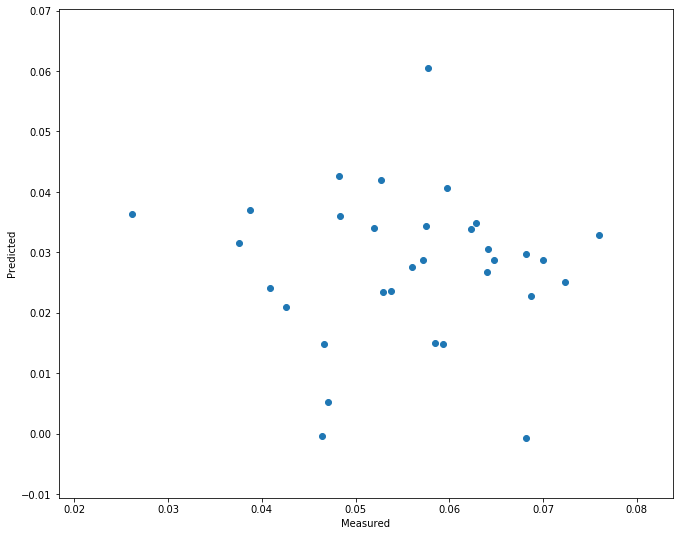

In [300]:
fig, ax = plt.subplots()
ax.scatter(y_truth*100, y_forecasted_fromNJ[0:32]*100)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

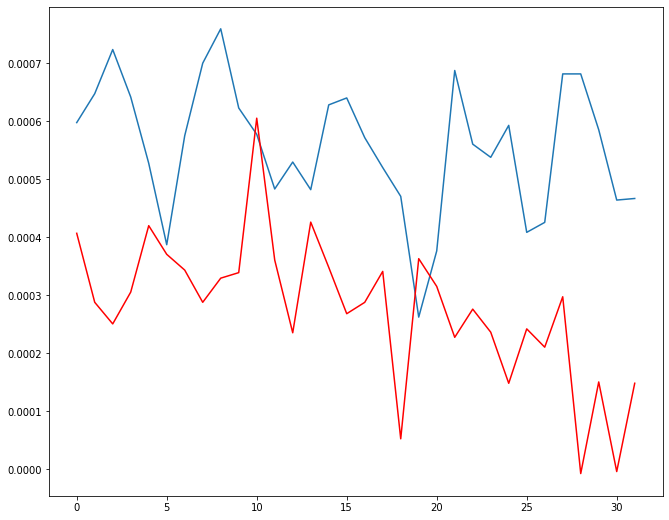

In [301]:
plt.plot(y_truth.values)
plt.plot(y_forecasted_fromNJ[0:32].values, color='red')

## 8. Model Optimization <a name="model_optmization"></a>

Gather some population and population density data 

In [154]:
Texas_Population = 29900000
NJ_Population = 9234000
NY_Population = 18834000

TX_PopDen = 109.9
NJ_PopDen = 1211
NY_PopDen = 421 

In [188]:
NY_PeakDC = 11661
NJ_PeakDC = 4384
TX_PeakDC_pct = ((NY_PeakDC/NY_Population) + (NJ_PeakDC/NJ_Population))/2
TX_PeakDC_pct

0.0005469566948690185

In [189]:
TX_PeakDC = TX_PeakDC_pct * Texas_Population
TX_PeakDC

16354.005176583652

In [208]:
test_TX_curveDay = test_TX_curveDay.set_index('Curve_Day')
test_TX_curveDay

,Pop_Pct
Curve_Day,
1,0.000150
2,0.000142
3,0.000104
4,0.000171
5,0.000180
6,0.000207
7,0.000199
8,0.000188
9,0.000203


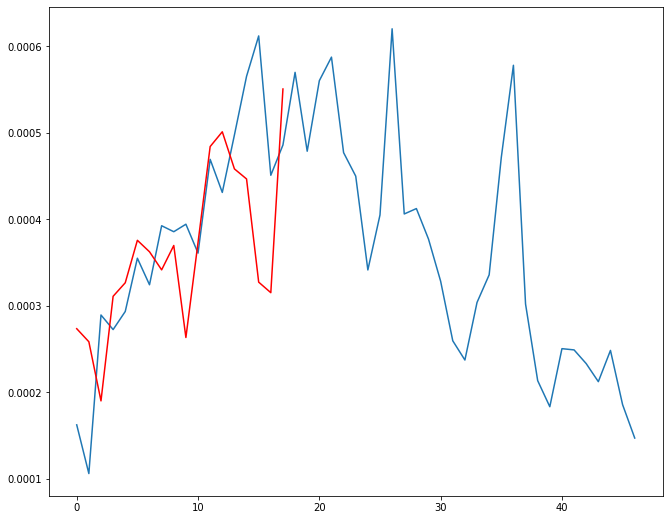

In [244]:
plt.plot(test_NY_curveDay.values)
plt.plot(test_TX_curveDay.values/0.55, color='red')

#### For optimization purpose, we import Arizona's data as new reference from Worldometer website


Pop_Pct has been calculated from Daily New Cases and a population (Arizona) of 7279000 is used.

A rough cut-off of consistency of 0.00015 from the population has been used to set the Curve_Day. Curve_Day 1 is set to be June-18.

One consideration is to set the same day (Thursday) as TX dataset to match the weekly seasonal trend.

In [3]:
#corona_data_AZ = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7331/Extra/CoronaCurves/Arizona_CurveDay.csv",low_memory=False)
corona_data_AZ = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7331/Extra/CoronaCurves/Arizona_CurveDay2.csv",low_memory=False)

corona_data_AZ

,Curve_Day,Pop_Pct
0,1,0.000446
1,2,0.000427
2,3,0.000356
3,4,0.000302
4,5,0.000494
...,...,...
69,70,0.000093
70,71,0.000071
71,72,0.000086
72,73,0.000051


In [4]:
test_AZ_curveDay = corona_data_AZ[['Curve_Day','Pop_Pct']]
test_AZ_curveDay = test_AZ_curveDay.set_index('Curve_Day')
test_AZ_curveDay

,Pop_Pct
Curve_Day,
1,0.000446
2,0.000427
3,0.000356
4,0.000302
5,0.000494
...,...
70,0.000093
71,0.000071
72,0.000086


In [10]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(test_AZ_curveDay,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:-956.7583897126308
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:-916.3484715278265
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:-1003.7889640333027
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:nan
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:-1026.7617396372107
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:-1005.4455689343134
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:-925.0245501163056
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:-891.621912147304
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:-984.0843656949513
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:-935.2666050616294
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:-986.5527172095586
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:-894.610910621568
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:-1013.2518048922716
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:-983.2285534213074
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:-924.3808381365479
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:-875.9183532089627
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:-1090.5508139145932
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:-994.5450395417004
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:-951.

In [9]:
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
modAZ_C = sm.tsa.statespace.SARIMAX(test_AZ_curveDay,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultsAZ_C = modAZ_C.fit()

print(resultsAZ_C.summary().tables[1])

C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\taniat470s\anaconda3_again\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377   4.81e-18  -4.94e+16      0.000      -0.238      -0.238
ma.L1         -0.6289   2.03e-17   -3.1e+16      0.000      -0.629      -0.629
ar.S.L7        0.1694   2.08e-17   8.14e+15      0.000       0.169       0.169
ma.S.L7       -0.6209   9.12e-18  -6.81e+16      0.000      -0.621      -0.621
sigma2      1.246e-08    2.5e-09      4.986      0.000    7.56e-09    1.74e-08


In [273]:
pred_AZ_C = resultsAZ_C.get_prediction(start=18,dynamic=False)

In [274]:
pred_ci = pred_AZ_C.conf_int()

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Pct Levels')

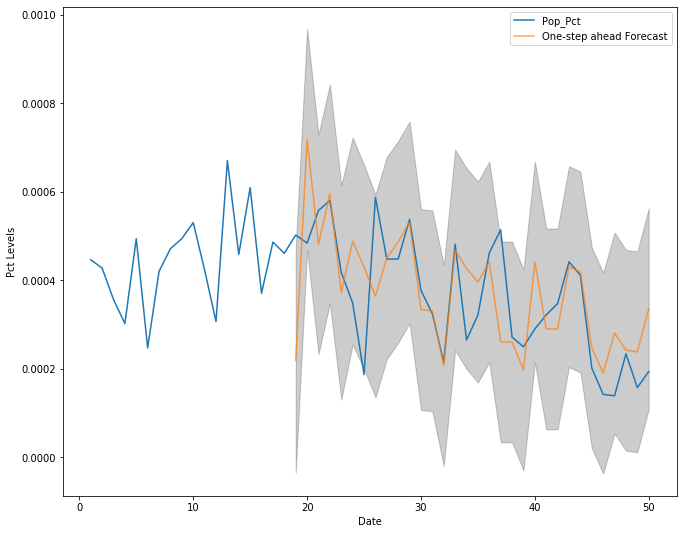

In [275]:
ax = test_AZ_curveDay.plot(label='observed')
pred_AZ_C.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Pct Levels')
plt.legend()

plt.show()

In [276]:
y_forecasted = pred_AZ_C.predicted_mean
y_truth = test_AZ_curveDay[18:]

# Compute the mean square error
mse = ((y_forecasted - y_truth.transpose()) ** 2).mean()
np.average(mse)

1.4166646611167178e-08

In [277]:
rmse(y_truth, y_forecasted)
mape2(y_truth, y_forecasted)
mean_squared_error(y_truth, y_forecasted)

0.00011902372289240149

28.264118632199413

1.4166646611167178e-08

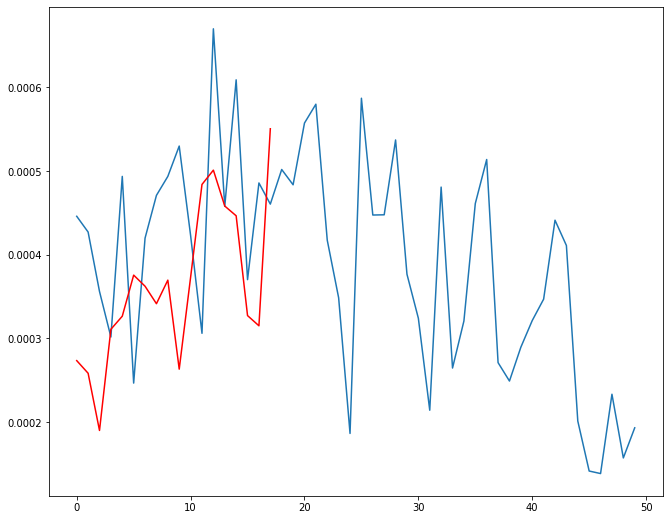

In [278]:
plt.plot(test_AZ_curveDay.values)
plt.plot(test_TX_curveDay.values/0.55, color='red')

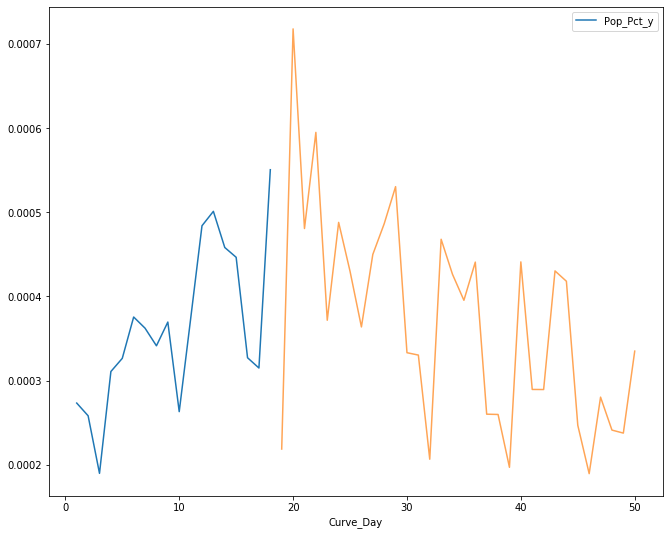

In [279]:
ax = merge_curveDay_TX_scal.plot(label='observed')
pred_AZ_C.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
plt.show()

In [280]:
pred_AZ_C.predicted_mean

Curve_Day
19    0.000219
20    0.000718
21    0.000481
22    0.000595
23    0.000372
24    0.000488
25    0.000430
26    0.000364
27    0.000450
28    0.000486
29    0.000530
30    0.000333
31    0.000330
32    0.000207
33    0.000468
34    0.000426
35    0.000395
36    0.000441
37    0.000260
38    0.000260
39    0.000197
40    0.000441
41    0.000290
42    0.000290
43    0.000430
44    0.000418
45    0.000247
46    0.000190
47    0.000280
48    0.000241
49    0.000238
50    0.000335
dtype: float64

In [281]:
y_forecasted.shape

(32,)

In [302]:
rmse(TX_data_sub, y_forecasted)
mape2(TX_data_sub, y_forecasted)
mean_squared_error(TX_data_sub, y_forecasted)

0.00022786723511235556

34.606201647736235

5.1923476837749526e-08

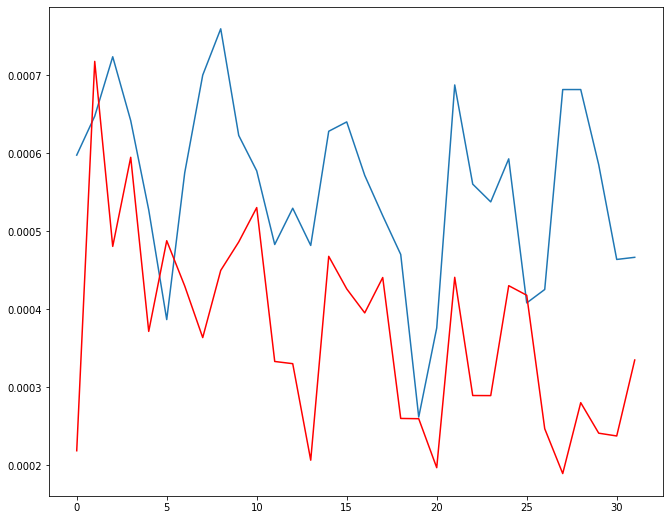

In [303]:
plt.plot(TX_data_sub.values)
plt.plot(y_forecasted.values, color='red')

From above we can see that, the original scaler of 0.55 (from NY and NJ) may not be apply well with Arizona case. We did a recalculation of scaler using presumed peak of TX (0.00054) of Pop_Pct (From Corona_Estimates 2.xlsx Document), and the real peak Pop_Pct of AZ which is 0.00067.

0.00054/0.00067=0.81

In [304]:
TX_data_sub_test = TX_data['Pop_Pct']/0.81

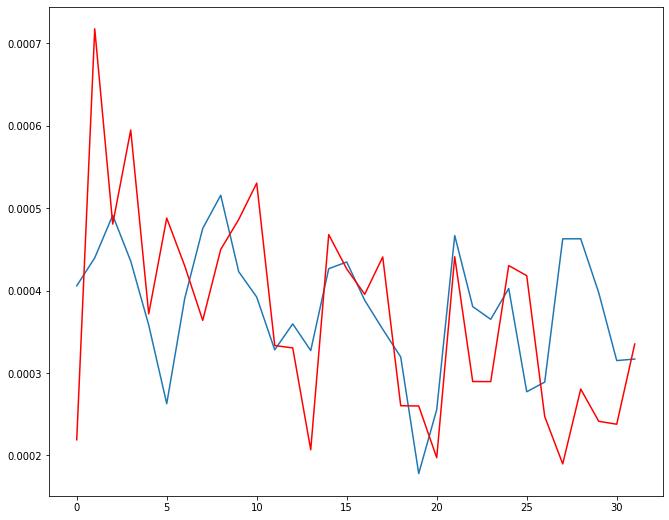

In [305]:
plt.plot(TX_data_sub_test.values)
plt.plot(y_forecasted.values, color='red')

In [306]:
rmse(TX_data_sub_test, y_forecasted)
mape2(TX_data_sub_test, y_forecasted)
mean_squared_error(TX_data_sub_test, y_forecasted)

0.00011782104081965657

24.89756683589606

1.388179765982718e-08

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

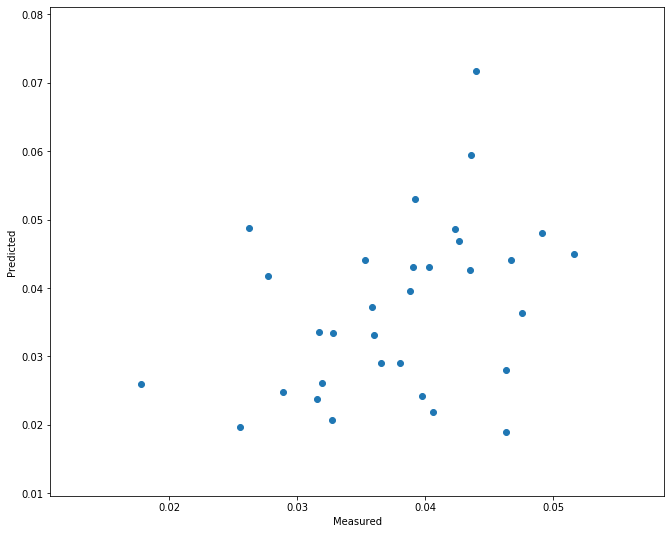

In [307]:
fig, ax = plt.subplots()
ax.scatter(TX_data_sub_test*100, y_forecasted*100)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 9. Final RAE Calculation <a name="final_fitting"></a>

Use file from Dr.Drew to check for final MAE with TX data up to 08/07/2020.

In [315]:
New_TX_data = pd.read_csv("C:/Users/taniat470s/Desktop/SMU_course/DS7331/Extra/CoronaCurves/Corona_MAE.csv",low_memory=False)
New_TX_data

,TX Date,Curve_Day,TX New Cases
0,7/7/2020,19,9828
1,7/8/2020,20,10649
2,7/9/2020,21,11901
3,7/10/2020,22,10554
4,7/11/2020,23,8674
5,7/12/2020,24,6363
6,7/13/2020,25,9457
7,7/14/2020,26,11514
8,7/15/2020,27,12490
9,7/16/2020,28,10243


In [316]:
New_TX_data['Pop_Pct'] = New_TX_data['TX New Cases']/29900000
New_TX_data.index = New_TX_data['Curve_Day']
New_TX_data = New_TX_data.drop(columns=['Curve_Day','TX Date','TX New Cases'])
New_TX_data

,Pop_Pct
Curve_Day,
19,0.000329
20,0.000356
21,0.000398
22,0.000353
23,0.000290
24,0.000213
25,0.000316
26,0.000385
27,0.000418


In [1]:
y_forecasted

NameError: name 'y_forecasted' is not defined

In [317]:
New_TX_data_sub = New_TX_data['Pop_Pct']/0.81

In [318]:
rmse(New_TX_data_sub, y_forecasted)
mape2(New_TX_data_sub, y_forecasted)
mean_squared_error(New_TX_data_sub, y_forecasted)

0.00010873708089889126

24.109453897722798

1.1823752762412022e-08

In [320]:
print ("The average MAE is: = ", mean_squared_error(New_TX_data_sub, y_forecasted))

The average MAE is: =  1.1823752762412022e-08


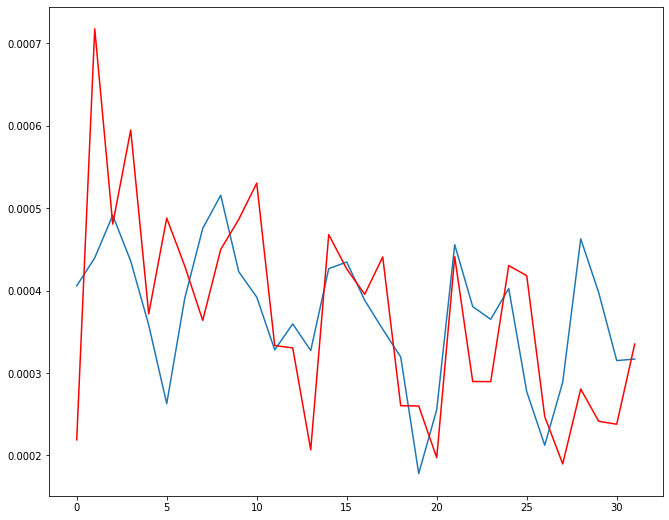

In [321]:
plt.plot(New_TX_data_sub.values)
plt.plot(y_forecasted.values, color='red')

Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

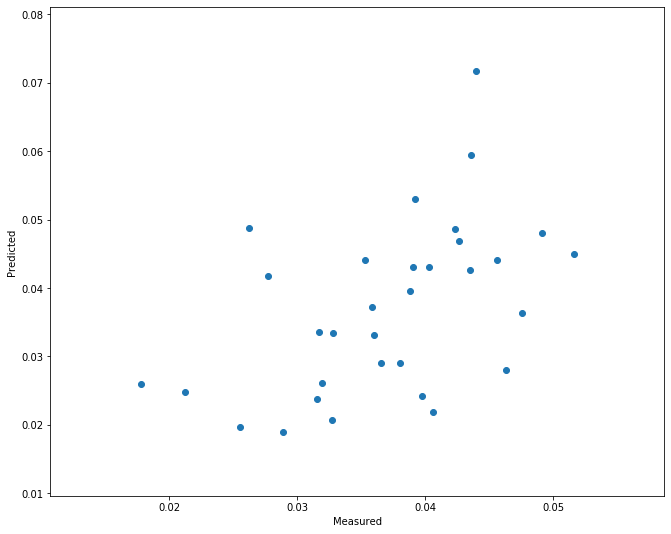

In [319]:
fig, ax = plt.subplots()
ax.scatter(New_TX_data_sub*100, y_forecasted*100)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()